In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

In [29]:
df_pizzas = pd.read_csv(r'Datawarehouse\pizzas_normales.csv')

In [30]:
pizzas_mes = df_pizzas.groupby('fecha')['unidades_total'].sum().reset_index()
pizzas_mes

,fecha,unidades_total
0,2023-01-01,2352.0
1,2023-02-01,2177.0
2,2023-03-01,1724.5
3,2023-04-01,1530.5
4,2023-05-01,1527.0


In [31]:
metadata = SingleTableMetadata()

metadata.detect_from_dataframe(pizzas_mes)

In [32]:
synthesizer = CTGANSynthesizer(metadata, epochs=1000)
synthesizer.fit(pizzas_mes)

C:\Users\Luka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sdv\single_table\base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [33]:
# Generar nuevos datos sintéticos para periodos anteriores
fechas_completas = pd.date_range(start='2022-01-01', end='2022-12-01', freq='MS')

df_sintetico = synthesizer.sample(num_rows=len(fechas_completas))

# Asignar las fechas completas a los datos sintéticos
df_sintetico['fecha'] = fechas_completas

In [34]:
# Convertir la columna 'fecha' a tipo datetime si aún no lo está
pizzas_mes['fecha'] = pd.to_datetime(pizzas_mes['fecha'])
df_sintetico['fecha'] = pd.to_datetime(df_sintetico['fecha'])

df_combinado = pd.concat([pizzas_mes, df_sintetico]).sort_values('fecha').reset_index(drop=True)
df_combinado

,fecha,unidades_total
0,2022-01-01,1958.4
1,2022-02-01,1708.6
2,2022-03-01,1795.9
3,2022-04-01,2321.9
4,2022-05-01,1865.1
5,2022-06-01,2293.9
6,2022-07-01,1733.6
7,2022-08-01,2352.0
8,2022-09-01,1527.0
9,2022-10-01,1527.0


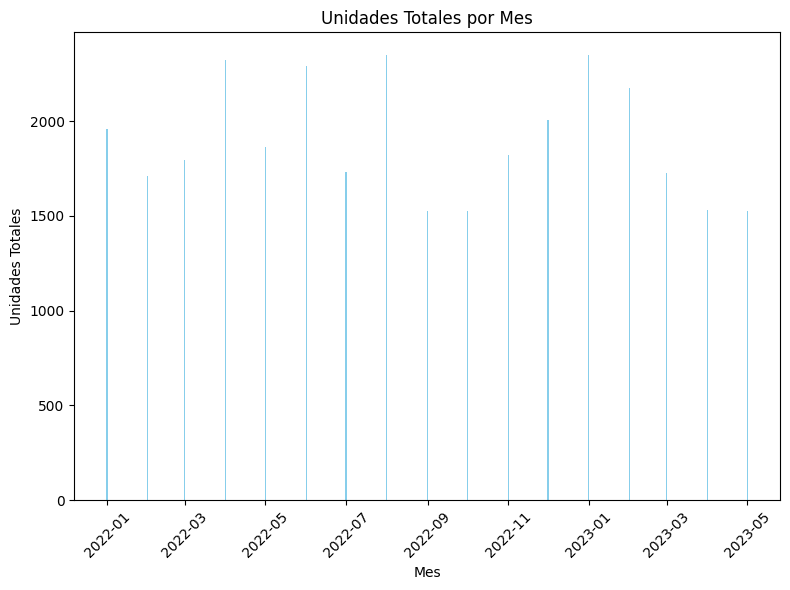

In [35]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df_combinado['fecha'], df_combinado['unidades_total'], color='skyblue')

# Personalizar el gráfico
plt.xlabel('Mes')
plt.ylabel('Unidades Totales')
plt.title('Unidades Totales por Mes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización si es necesario

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [36]:
df_combinado.to_csv(r'Datawarehouse\pizzas_normales_sd.csv', index=False)